# Assumptions of OLS Regression

In the previous checkpoint, we saw that OLS estimates the coefficients of the linear regression model by minimizing the sum of the squared error terms of the model. However, in order these estimated coefficients to be valid, some assumptions regarding the data and the model should be met. These assumptions are known as **Gauss Markov Assumptions** or **Gauss Markov Conditions**. In this checkpoint, we'll review these assumptions using our medical costs model from the previous checkpoint.

Before interpreting the estimated coefficients of a linear regression model, it's always a good idea to check whether the Gauss Markov assumptions hold. Otherwise, we need to fix our model. Sometimes fixing a model means to apply a technique to solve for a specific problem. But usually, we need to change our model by including additional variables or excluding problematic ones. Once we corrected our model then we can estimate it using OLS and check whether the Gauss Markov conditions are met or not. As you see, this is an iterative process.

Let's begin with importing our libraries and reloading our model from the previous checkpoint. Then we can start discussing these assumptions one by one.

## Our medical costs model

We'll use our medical costs model from the previous checkpoint to demonstrate the Gauss Markov conditions. So, we need to import the relevant libraries and do the feature engineering steps. Then we fit our model using OLS.

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore")

In [2]:
## todo the data will be loaded from postgre
insurance_df = pd.read_csv("../datasets/insurance.csv")
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
5,31,female,25.740,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506
8,37,male,29.830,2,no,northeast,6406.411
9,60,female,25.840,0,no,northwest,28923.137


In [3]:
insurance_df["is_male"] = pd.get_dummies(insurance_df.sex)["male"]
insurance_df["is_smoker"] = pd.get_dummies(insurance_df.smoker)["yes"]

insurance_df.region[np.where(np.isin(insurance_df.region, "southwest"))[0]] = 0
insurance_df.region[np.where(np.isin(insurance_df.region, "northwest"))[0]] = 1
insurance_df.region[np.where(np.isin(insurance_df.region, "southeast"))[0]] = 2
insurance_df.region[np.where(np.isin(insurance_df.region, "northeast"))[0]] = 3

In [56]:
# Y is the target variable
Y = insurance_df['charges']
# X is the feature set which includes
# is_male and is_smoker variables
X = insurance_df[['is_male','is_smoker']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  -65.37843464 23622.1345855 ]

Intercept: 
 8466.035826716768


## Assumption one: linearity of the model in the coefficients

Linearity assumption of the Gauss Markov conditions states that the target variable should have a linear relationship between the __coefficients__ of the model. People often confuses this condition by speculating that the linear relationship is between the target and the features. However a model like (eq.1) below is a totally valid one:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2^2 + \epsilon \qquad(eq.1)$$

As we mentioned earlier, linear regression model is quite flexible in capturing the non-linear relationships between the target and the features. For example, in the (eq.1), the relationship between the $y$ and $x$ is indeed quadratic. Below, we show how linear regression correctly estimates the intercept and the coefficients of the following model:

$$ y = 1 + 2x_1 + 3x_2^2 + \epsilon \qquad(eq.2)$$



Coefficients: 
 [2. 3.]

Intercept: 
 0.9999999995343387


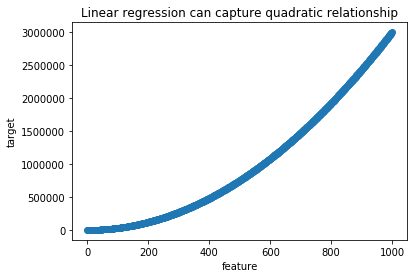

In [52]:
df = pd.DataFrame()

# data from 0 to 999
df["X"] = np.arange(0,1000,1)
# we take the square of X
df["X_sq"] = X**2

# this is our equation: y = 1 + 2*X + 3*X^2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm = linear_model.LinearRegression()
lrm.fit(df[["X","X_sq"]],df["Y"])

# predictions of the linear regression
Y_hat = lrm.predict(df[["X","X_sq"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X"], Y_hat)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

As you can see, the linear regression model correctly estimated the true coefficients and captured the quadratic relationship between the target and the feature.

In contrast, a model like the one below is an invalid one as it violates the linearity assumption:

$$ y = \beta_0 + \beta_1x_1 + \beta_1^2x_1 + \epsilon \qquad(eq.2)$$

This is because, the relationship between the target $y$ and the coefficient $\beta_1$ is not linear. 

In principle, this assumption is not related with the estimation but with how we specify your model. So, as long as we use models that take into account this lienarity assumption as we did in our medical costs example, then we shouldn't worry about this assumption at all.

## Assumption two: the error term should be zero on average

This second assumption states that the expected value of the error term should be zero. In mathematical terms:

$$\mathbb{E}(\epsilon) = 0$$

$\mathbb{E}$ symbol indicates the expectation operator. We can read it as the average of the error terms should be equal to zero. Error term accounts for the variation in the target variable that is not explained by the features. So, ideally the error term shouldn't explain anything in the variation of the target variable but instead should be determined randomly. If the expected value of the error is different than zero, our model would become biased! For example, if $\mathbb{E}(\epsilon) = -1$, then it means that our model systematically overpredicts the target variable. 

This assumption is not hold if you forget to include the constant term in your model. **This is why we said that you should always include a constant in your model**. As long as we include a constant in a model, we shouldn't be worried about this assumption as the constant will force the error terms to be zero on average.

In our medical costs model, we can check this out:

In [58]:
predictions = lrm.predict(X)
errors = predictions - Y

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 2.131670691150899e-12


Since, we include the constant term in the model, the average of the model's error are zero effectively.

## Assumption three: homoscedasticity

Homoscedasticity assumption states that the distribution of the error terms (its called "scedasticity"), should be consistent for all predicted values, or **homoscedastic**. In other words, the variance of the erros shouldn't be changed systematically with the observations. If the error terms are not homoscedastic, then it's called **heteroscedastic**.

For example, if our error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance.  This leads to overconfidence in the accuracy of our model's predictions.

Let's checkout whether our medical costs model suffers from the heteroscedasticity by visualizing it:

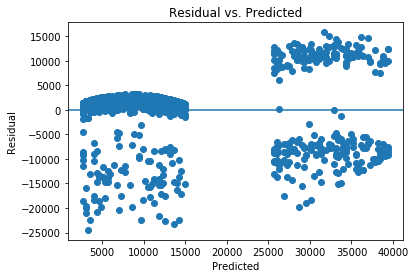

In [173]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

It seems that the variances of the errors are higher for the higher values of the target variable. This implies that our error terms aren't homoscedastic. However, deriving conclusions from visuals are informal way of figuring out the problem. Thankfully, there are several formal statistical tests that we can use to determine whether there is heteroscedasticity in the error terms. 

Here we demonstrate the Bartlett and the Levene tests. The null hypotheses of the both tests state that the errors are homoscedastic. Both tests can be imported from scipy's stats module.

In [174]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 310.555 and p value is 1.65e-69
Levene test statistic value is 194.8 and p value is 8.7e-43


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

There may be several causes of heteroscedasticity. Examples include, outliers in the data and omitted variables that are important in explaining the variance of the target variable. So, dealing with the outliers and including relevant variables help to fix the heteroscedasticity problem. Some fixes to heteroscedasticity include transforming the dependent variable and adding features that target the poorly-estimated areas. 

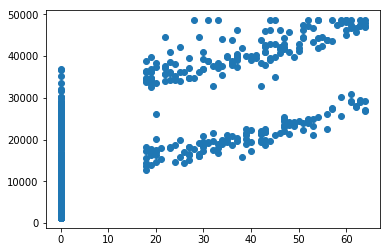


Coefficients: 
 [  267.13207353 22485.09868869    29.08644301]

Intercept: 
 -2085.7348271211176


In [172]:
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize


# Y is the target variable
Y = insurance_df['charges']
Y = winsorize(Y, (0.01, 0.01))

plt.scatter(insurance_df.age_is_smoker, Y)
plt.show()
#Y = np.log(Y)
# X is the feature set which includes
# is_male and is_smoker variables
insurance_df["age_is_smoker"] = insurance_df.age*insurance_df.is_smoker
insurance_df["age_sq"] = insurance_df.age**2
X = insurance_df[[ 'age', 'is_smoker','age_is_smoker']]
# Y = boxcox(Y)[0]
# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = predictions - Y
# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

In [102]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 91.6431 and p value is 1.04e-21
Levene test statistic value is 8.53814 and p value is 0.00351


## Assumption four: low multicollinearity

Correlations among features should be low or nonexistent.  When features are correlated, they may both explain the same pattern of variance in the outcome.  The model will attempt to find a solution, potentially by attributing half the explanatory power to one feature and half to the other.  This isn’t a problem if our only goal is prediction, because then all that matters is that the variance gets explained.  However, if we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.

If there is a correlation between a variable and another or several variables, this is called **perfect multicollinearity**. It is easy to understand perfect collinearity between two variables. But, how come one variable can be correlated with several variables? This happens when that variable is a linear combination of the others. 

** A remark on dummy variables:** A caution is needed when working with dummy variables just because of this linear combination issue. If we create some dummy variables from a categorical variable, then we need to exclude one of them from the model. This is because anyone of those dummy variables can be represented as 1 minus the sum of the others. Hence a perfect multicollinearity occurs.

To detect multicollinearity, we can simply look at the correlation matrix of the features. Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

## Assumption five: error terms should be uncorrelated with each other

Another assumption with the error terms is that they should be uncorrelated with each other. In other terms, error term shouldn't predict the next value of itself. This type of serial correlation may happen if we omit a relevant variable from the model. So, including the variable into the model can solve for this issue. 

To identify whether the error terms are correlated with each other or not, we can graph them. In the graph, we need to observe randomness.

Let's check our medical costs model's errors:

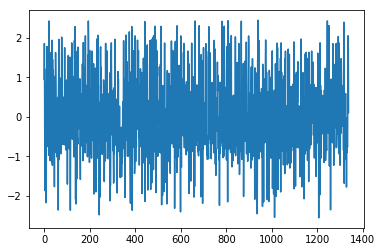

In [96]:
plt.plot(errors)
plt.show()

It seems that the error terms of our model are uncorrelated with each other.

Another way to look at the correlations between the errors is to use **autocorrelation function**. This function gives the correlations of the variables with itself assuming that the errors are ordered. In our case, the order of the errors are the orders of the observations. We can use the `acf()` function from statsmodels as follows: 

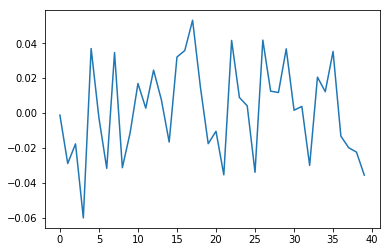

In [118]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of our medical costs model are indeed very low (ranges between -0.06 and 0.05).

## Assumption six: the features shouldn't be correlated with the errors

Probably the most important assumption of the linear regression model is the independency between the explanatory variables and the errors. This is because if this assumption doesn't hold, then the predictions of the models will be unreliable as the estimates of the coefficients would be biased. This assumption is known as the **exogeneity**.

Violations of the exogeneity assumption may have several sources. The major ones are the omitted variables and the simultaneous causation between independent variables and the target.

## An important remark on the normality of the errors

So far in this checkpoint, we covered six assumptions of the OLS regression. Another important thing to consider in our models is the normality of the error terms. Although, it is not an assumption of the OLS, it still has some impacts on our results. Specifically, normality of the errors are not required to apply OLS to a linear regression model but some statistics regarding the significancy of the coefficients requires the error terms to be distributed normally. We are talking about the t and F tests which we'll cover in the next checkpoint. 

There are various ways to check for the normality of the error terms. An informal way of doing this is visualizing the errors in a QQ plot or to look at the histogram:

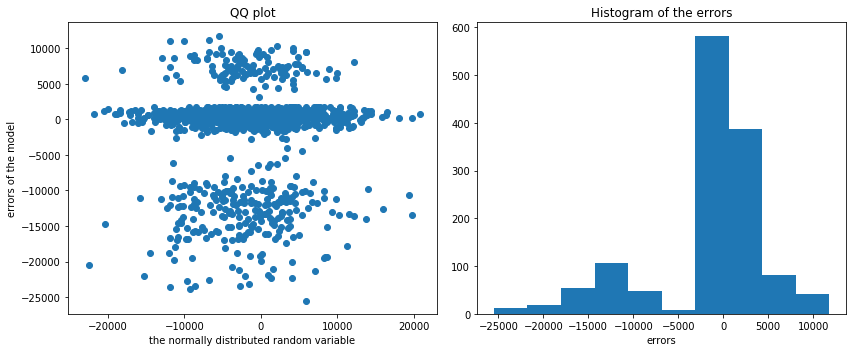

In [155]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

As can be seen in the charts above, our errors are not normally distributed. Otherwise, we should see a straight line going from the bottom-left to the upper-right of the QQ plot and a regular bell curve like shape in the histogram.

Although, visualizations give us a first impression about the normality; the best way to learn about this is to apply formal statistical tests. To this end, we use two of them from scipy's stats module: Jarque Bera test and normal test. The null hypothesis of the both tests state that the errors are normally distributed.

Let's use these tests to find out whether our error terms are normally distributed or not:

In [53]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [54]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 305.1072687744573 and p value is 0.0
Normality test statistics is 204.36465518121565 and p value is 4.1954541509716663e-45


The p-values of both tests indicate that our errors are not normally distributed.

# Drill: 

Use the model you built in the previous checkpoint for this exercise. Check for all of the assumptions above and make sure that everyhing is fine. If one of the assumptions do not hold, fix it and come up with another model until you end up with a model that satisfies all of the conditions.